In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/casting_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_dir = 'C:/Users/asame/Desktop/Casting Product/jupyter noteboooklarım/casting_data/train'
test_dir = 'C:/Users/asame/Desktop/Casting Product/jupyter noteboooklarım/casting_data/test'

In [3]:
%pwd


'C:\\Users\\asame\\Desktop\\Casting Product\\jupyter noteboooklarım'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [5]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32, 2)


In [6]:
class_names = train_data.class_indices
class_names = list(class_names.keys())
print(class_names)

['def_front', 'ok_front']


In [7]:
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    
    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

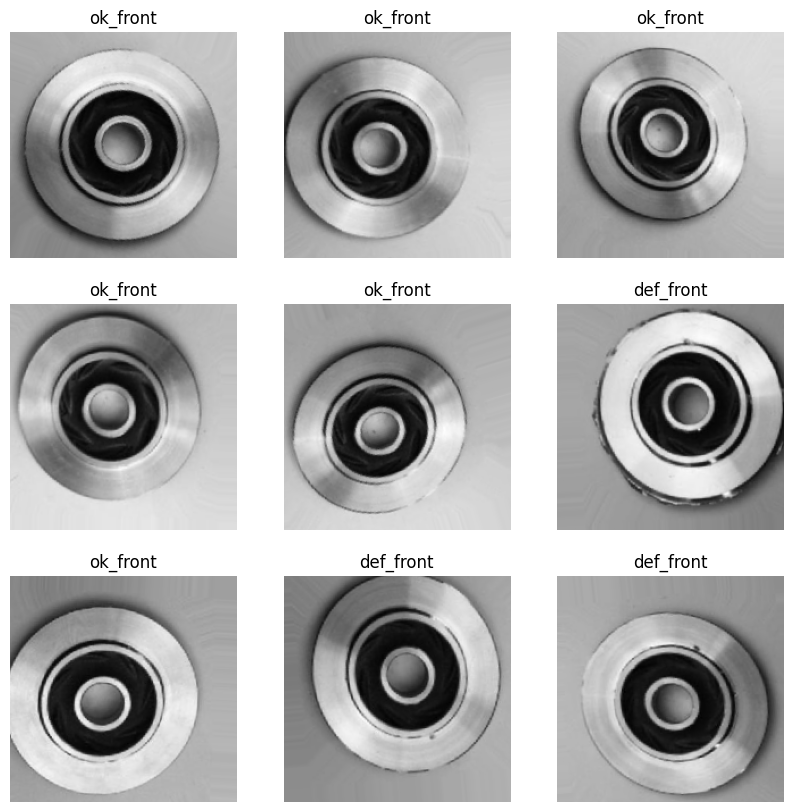

In [8]:
sample_images(train_data, nrows=3, ncols=3)


In [44]:
image_batch

array([[[[0.62564826, 0.62564826, 0.62564826],
         [0.627451  , 0.627451  , 0.627451  ],
         [0.627451  , 0.627451  , 0.627451  ],
         ...,
         [0.6161319 , 0.6161319 , 0.6161319 ],
         [0.61651367, 0.61651367, 0.61651367],
         [0.6174525 , 0.6174525 , 0.6174525 ]],

        [[0.62377065, 0.62377065, 0.62377065],
         [0.627451  , 0.627451  , 0.627451  ],
         [0.627451  , 0.627451  , 0.627451  ],
         ...,
         [0.6193824 , 0.6193824 , 0.6193824 ],
         [0.61960787, 0.61960787, 0.61960787],
         [0.61960787, 0.61960787, 0.61960787]],

        [[0.62189305, 0.62189305, 0.62189305],
         [0.627451  , 0.627451  , 0.627451  ],
         [0.627451  , 0.627451  , 0.627451  ],
         ...,
         [0.61960787, 0.61960787, 0.61960787],
         [0.61960787, 0.61960787, 0.61960787],
         [0.61960787, 0.61960787, 0.61960787]],

        ...,

        [[0.5189324 , 0.5189324 , 0.5189324 ],
         [0.5226876 , 0.5226876 , 0.5226876 ]

In [9]:
# Model layers
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(2 ,activation='softmax')
])

C:\Users\asame\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)            ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)         │ (None, 199, 199,  │       416 │
│                         │ 32)               │           │
├─────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d           │ (None, 99, 99,    │         0 │
│ (MaxPooling2D)          │ 32)               │           │
├─────────────────────────┼───────────────────┼───────────┤
│ conv2d_1 (Conv2D)       │ (None, 98, 98,    │     8,256 │
│                         │ 64)               │           │
├─────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_1         │ (None, 49, 49,    │         0 │
│ (MaxPooling2D)          │ 64)               │           │
├─────────────────────────┼───────────────────┼───────────┤
│ conv2d_2 (Conv2D)       │ (None, 48, 48,    │    32,896 │
│                         │ 128)              │           │
├─────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_2         │ (None, 24, 24,    │         0 │
│ (MaxPooling2D)          │ 128)              │           │
├─────────────────────────┼───────────────────┼───────────┤
│ flatten (Flatten)       │ (None, 73728)     │         0 │
├─────────────────────────┼───────────────────┼───────────┤
│ dense (Dense)           │ (None, 256)       │ 18,874,6… │
├─────────────────────────┼───────────────────┼───────────┤
│ dropout (Dropout)       │ (None, 256)       │         0 │
├─────────────────────────┼───────────────────┼───────────┤
│ dense_1 (Dense)         │ (None, 2)         │       514 │
└─────────────────────────┴───────────────────┴───────────┘

 Total params: 18,916,706 (72.16 MB)

 Trainable params: 18,916,706 (72.16 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(train_data,
                    epochs=50,
                    batch_size=32,
                    )

Epoch 1/50


C:\Users\asame\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/208 ━━━━━━━━━━━━━━━━━━━━ 180s 844ms/step - accuracy: 0.5631 - loss: 1.1530
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 166s 784ms/step - accuracy: 0.6834 - loss: 0.6002
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 191s 902ms/step - accuracy: 0.8385 - loss: 0.3682
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 181s 858ms/step - accuracy: 0.8871 - loss: 0.2824
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 174s 820ms/step - accuracy: 0.9190 - loss: 0.2154
Epoch 6/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 181s 863ms/step - accuracy: 0.9295 - loss: 0.1913
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 182s 866ms/step - accuracy: 0.9449 - loss: 0.1483
Epoch 8/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 187s 889ms/step - accuracy: 0.9363 - loss: 0.1624
Epoch 9/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 205s 976ms/step - accuracy: 0.9486 - loss: 0.1377
Epoch 10/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 186s 883ms/step - accuracy: 0.9369 - loss: 0.1601
Epoch 11/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 195s 930ms/step - accuracy: 0.9471 - loss: 0.1525
Epoch 12/50
208/208

In [13]:
def plot_history(history, metric):
  plt.plot(history.history[metric])    
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.show()

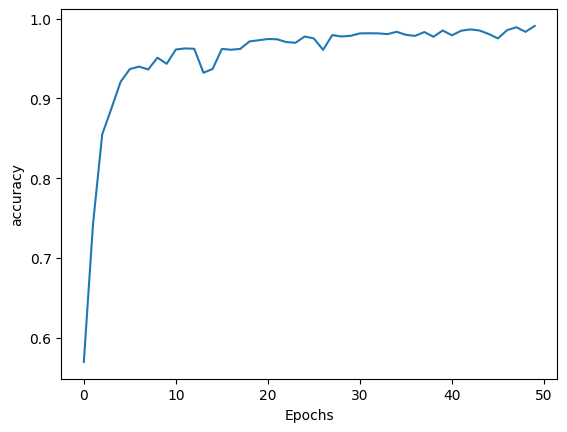

In [23]:
plot_history(history, 'accuracy')


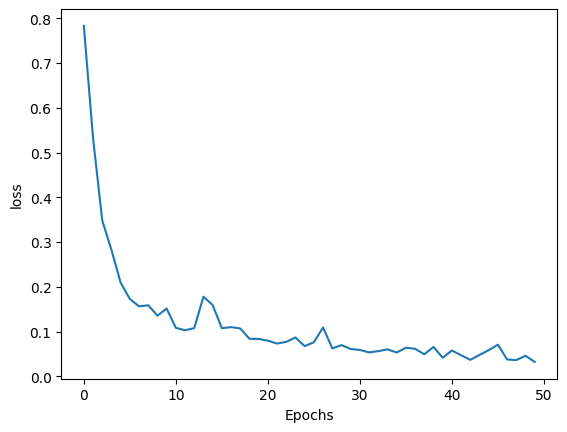

In [24]:
plot_history(history, 'loss')


In [16]:
result = model.evaluate(test_data)
print("Test loss, Test accuracy : ", result)

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9880 - loss: 0.0551
Test loss, Test accuracy :  [0.04819631949067116, 0.9874125719070435]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


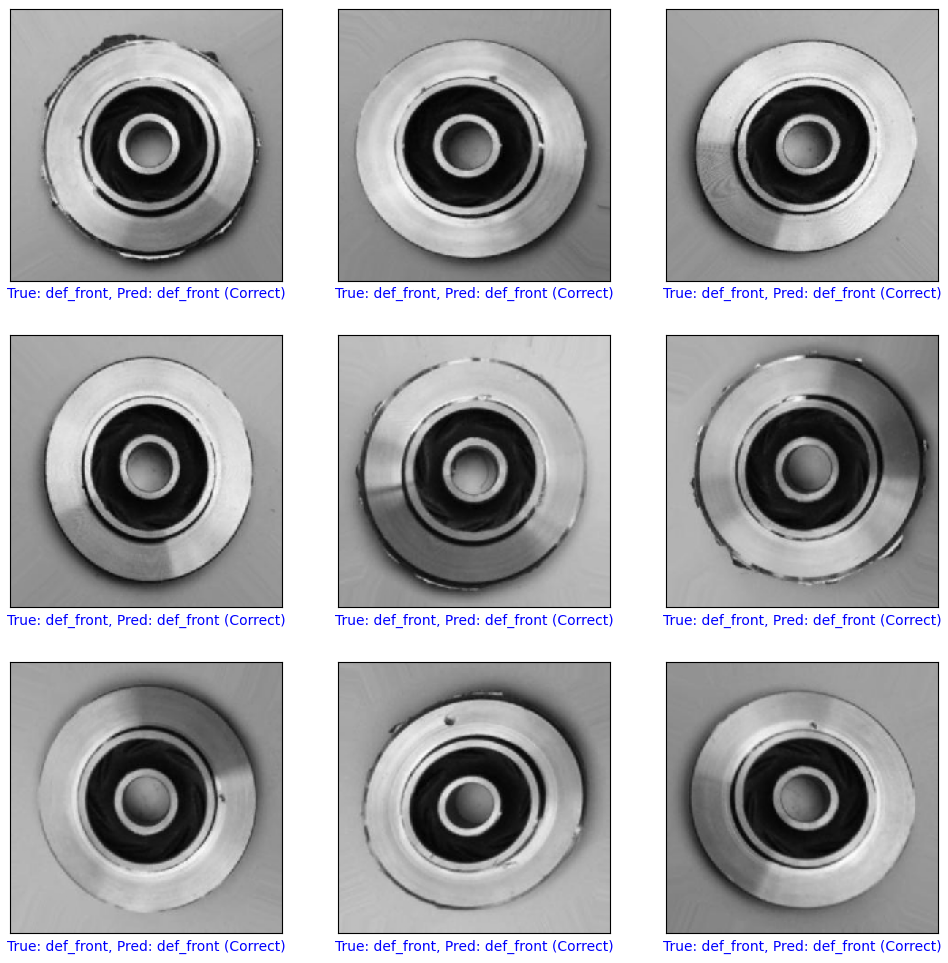

In [22]:
images, labels = next(test_data)    

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = model.predict(images)


class_names=list(test_data.class_indices.keys())


plt.figure(figsize=(12,12))
    
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
        
    image = images[i]
        
    if image.shape[-1] == 1:
        image = np.squeeze(image) 
        
    plt.imshow(image)
        
    predicted_label = np.argmax(predictions[i])
        
    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"
            
    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"        
            
    plt.xlabel(label_text,color=color)

In [28]:
import os
print(os.getcwd())  # Bu, şu anda çalıştığınız dizini gösterecektir.


C:\Users\asame\Desktop\Casting Product\jupyter noteboooklarım


In [30]:
directory = os.getcwd()  # Şu anki çalışma dizini
print(os.listdir(directory))  # Bu dizinde hangi dosyaların olduğuna bakınos.listdir(directory))  # Bu dizinde hangi dosyaların olduğuna bakın


['.ipynb_checkpoints', 'casting_data', 'Untitled.ipynb']


In [36]:
import os

# Klasörün var olup olmadığını kontrol edin
train_dir = 'C:/Users/asame/Desktop/Casting Product/jupyter noteboooklarım/casting_data/train'
test_dir = 'C:/Users/asame/Desktop/Casting Product/jupyter noteboooklarım/casting_data/test'
print("Train directory exists:", os.path.exists(train_dir))
print("Test directory exists:", os.path.exists(test_dir))

# Klasörün içindeki dosyaları listeleme
if os.path.exists(train_dir):
    print("Train directory contents:", os.listdir(train_dir))

if os.path.exists(test_dir):
    print("Test directory contents:", os.listdir(test_dir))


Train directory exists: True
Test directory exists: True
Train directory contents: ['def_front', 'ok_front']
Test directory contents: ['def_front', 'ok_front']
